# 1. Building a CNN model from scratch and to get to ~96% Accuracy

To train a neural network, handle the images in equal proportions or uniform size. We will choose 100x100 pixels for this. Import Tensorflow for model building and Keras API.  

# Import the libraries

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

We can use these libraries to analyze the dataset and train on the machine learning models available with TensorFlow

In [31]:
# importing libraries
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
import time

In [32]:
img_width, img_height = 200, 200

train_data_dir = 'code/dataset/Train'
validation_data_dir = 'code/dataset/Test'
nb_train_samples = 4255
nb_validation_samples = 1011
epochs = 50
batch_size = 16

input_shape = (img_width, img_height, 3)

In [53]:
start = time.time()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('healthy') and 1 
        tf.keras.layers.Dense(3, activation='softmax')
])



model.save_weights('model_cnn.weights.h5')

In [54]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,184,995 (4.52 MB)

 Trainable params: 1,184,995 (4.52 MB)

 Non-trainable params: 0 (0.00 B)

We are defining a Sequential layer, by adding some convolution layers first. Here we put the 100x100 size and 3 for depth color as parameter for input_shape. Then flatten the final result to feed into the densely connected layers.

Since we are solving a categorical classification problem, we will need the network with a softmax activation. The output of the network will be a vector of i.e. 3 possible outcomes.

In [62]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

"\nfrom tensorflow.keras.optimizers import RMSprop\nmodel.compile(loss='categorical_crossentropy',\n                    optimizer=RMSprop(learning_rate=1e-4),\n                    metrics=['accuracy'])"

# Data preprocessing
Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (with their labels) to the model. These generators will yield batches of images of size 100x100 and their labels (categorical)

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(200, 200),
                                                    batch_size = 16, 
                                                    class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(200, 200),
                                                       batch_size = 16, 
                                                       class_mode ='categorical', 
                                                       shuffle=False)

Found 3530 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


# Training

Now we will train on 4,245 images available, for 50 epochs, and monitor the accuracy as well as on the 1,011 images in the validation set. The output for the model training are Loss, Accuracy, Validation Loss and Validation Accuracy. 

In [64]:
history = model.fit(train_generator,
                    steps_per_epoch = 10 // batch_size,
                    epochs = epochs, 
                    validation_data = validation_generator,
                    validation_steps = 5 // batch_size,
                   ) 

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 191ms/step - accuracy: 0.4553 - loss: 0.9649 - val_accuracy: 0.5025 - val_loss: 1.4729
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 187ms/step - accuracy: 0.6585 - loss: 0.7081 - val_accuracy: 0.6686 - val_loss: 0.7376
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 188ms/step - accuracy: 0.7095 - loss: 0.6301 - val_accuracy: 0.6825 - val_loss: 0.8696
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.7432 - loss: 0.5751 - val_accuracy: 0.6795 - val_loss: 0.9091
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.7603 - loss: 0.5375 - val_accuracy: 0.7023 - val_loss: 0.6344
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.7750 - loss: 0.5048 - val_accuracy: 0.7122 - val_loss: 0.7723
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.7811 - loss: 0.4810 - val_accuracy: 0.7577 - val_loss: 0.5446
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.8169 - loss: 0

# Model Prediction
We will plot the training/validation accuracy and loss as collected during training

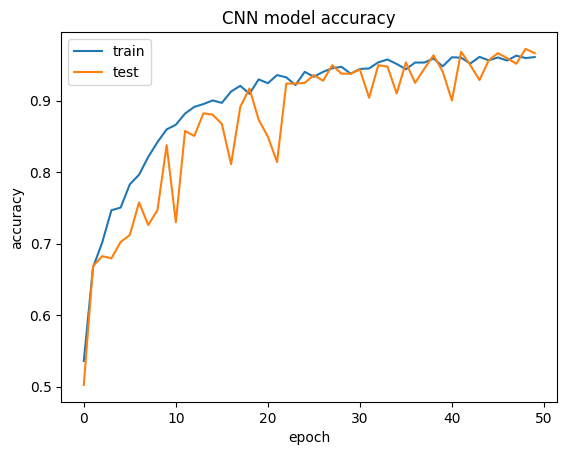

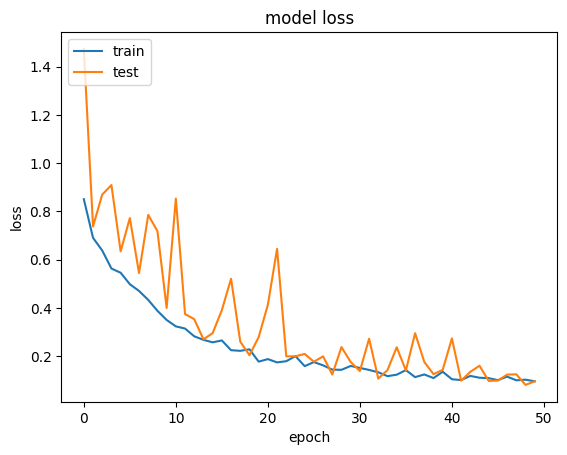

4186.111541032791


In [65]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_CNN')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)

# 2. Building xception model and to get to ~97% Accuracy

# Import the libraries

In [2]:
# importing libraries
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
import time

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

def lightweight_xception(input_shape=(200, 200, 3), num_classes=3):
    inputs = layers.Input(shape=input_shape)
    
    # Initial Conv Layer
    x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.SeparableConv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten layer to convert 4D tensor to 2D
    x = layers.Flatten()(x)

    # Fully Connected Layer
    x = layers.Dense(256, activation='relu')(x)  # Reduce dense units
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create a lightweight Xception-like model
lighter_xception_model = lightweight_xception(input_shape=(200, 200, 3), num_classes=3)

# Display the model summary
lighter_xception_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 200, 200, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_12                  │ (None, 100, 100, 32)        │             688 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_13                  │ (None, 50, 50, 64)          │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_14                  │ (None, 25, 25, 64)          │           4,736 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_15                  │ (None, 12, 12, 128)         │           8,896 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │              

 Total params: 1,199,059 (4.57 MB)

 Trainable params: 1,198,451 (4.57 MB)

 Non-trainable params: 608 (2.38 KB)

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.001)
lighter_xception_model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

# Data preprocessing
Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (with their labels) to the model. These generators will yield batches of images of size 100x100 and their labels (categorical)

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(200, 200),
                                                    batch_size = 16, 
                                                    class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(200, 200),
                                                       batch_size = 16, 
                                                       class_mode ='categorical', 
                                                       shuffle=False)

Found 3530 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


# Training

In [19]:
history = lighter_xception_model.fit(train_generator,
                              steps_per_epoch=10 // batch_size,
                              epochs=epochs, 
                              validation_data=validation_generator,
                              validation_steps=5 // batch_size)

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 64s 286ms/step - accuracy: 0.6128 - loss: 1.0694 - val_accuracy: 0.3027 - val_loss: 7.2781
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 64s 283ms/step - accuracy: 0.6798 - loss: 0.6890 - val_accuracy: 0.3254 - val_loss: 3.4682
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 64s 284ms/step - accuracy: 0.7211 - loss: 0.6282 - val_accuracy: 0.7141 - val_loss: 0.5745
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 74s 327ms/step - accuracy: 0.7512 - loss: 0.5547 - val_accuracy: 0.7141 - val_loss: 0.8932
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 68s 305ms/step - accuracy: 0.7687 - loss: 0.5210 - val_accuracy: 0.6162 - val_loss: 1.2310
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 63s 282ms/step - accuracy: 0.7839 - loss: 0.5233 - val_accuracy: 0.7438 - val_loss: 0.6563
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 60s 269ms/step - accuracy: 0.8323 - loss: 0.4297 - val_accuracy: 0.7280 - val_loss: 0.7379
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 67s 299ms/step - accuracy: 0.8219 - loss: 0

# Model Prediction
We will plot the training/validation accuracy and loss as collected during training

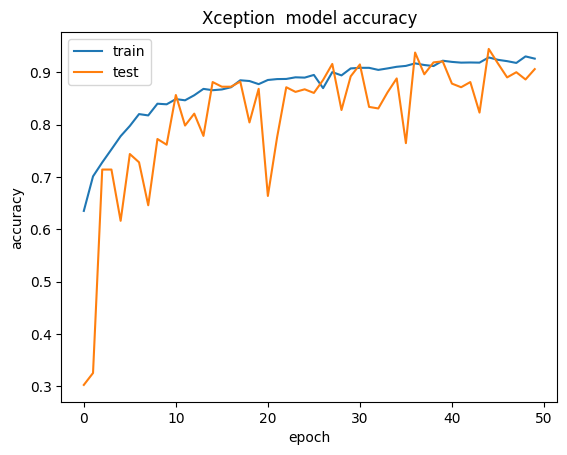

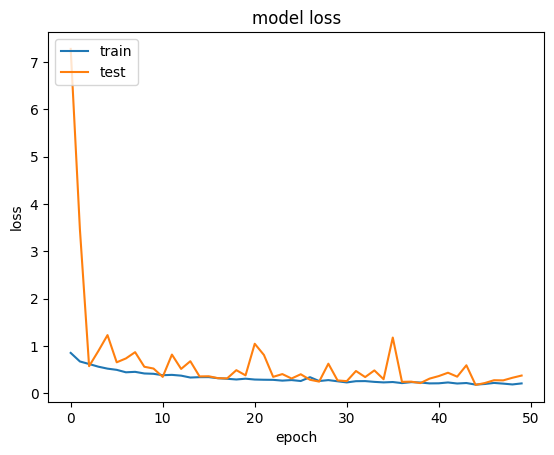

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

In [30]:
# Generate predictions
predictions = lighter_xception_model.predict(validation_generator, steps=len(validation_generator), verbose=1)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = validation_generator.classes

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


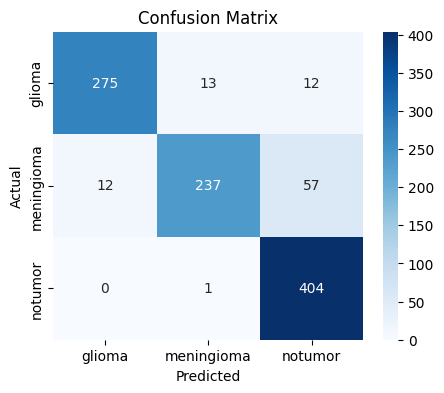

In [44]:
import seaborn as sns
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 3. Inception

In [33]:
# importing libraries
from keras.applications import InceptionV3

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

def lightweight_inception_model(input_shape=(200, 200, 3), num_classes=3):
    # Load the InceptionV3 base model with ImageNet weights (without the top layer)
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model to prevent it from updating during training
    base_model.trainable = False
    
    # Create the input layer
    inputs = layers.Input(shape=input_shape)
    
    # Pass the inputs through the pre-trained InceptionV3 base model
    x = base_model(inputs, training=False)  # Ensure the base model is in inference mode
    
    # Add custom layers on top of the base model to make it lighter
    x = layers.SeparableConv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # Output: (100, 100, 32)

    x = layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # Output: (50, 50, 64)
    
    x = layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    # Removed additional pooling layer to prevent negative dimension error
    # x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # Don't use this pooling layer to prevent going to 1x1

    # Use Global Average Pooling to reduce dimensions without risking negative sizes
    x = layers.GlobalAveragePooling2D()(x)  # Output: (128)

    # Fully connected layer with dropout to reduce overfitting
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # Create the complete model
    model = models.Model(inputs, outputs)
    
    return model

# Create the lighter InceptionV3 model with ImageNet weights
lightweight_inception_model = lightweight_inception_model(input_shape=(200, 200, 3), num_classes=3)

# Display the model summary
lightweight_inception_model.summary()

# Save the model weights
lightweight_inception_model.save_weights('lighter_inception_imagenet.weights.h5')


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 4, 4, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_29                  │ (None, 4, 4, 32)            │          84,000 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1063             │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_30                  │ (None, 2, 2, 64)            │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1064             │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_31                  │ (None, 1, 1, 128)           │           8,896 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1065             │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,966,563 (83.80 MB)

 Trainable params: 163,331 (638.01 KB)

 Non-trainable params: 21,803,232 (83.17 MB)

In [47]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
lightweight_inception_model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

# Data preprocessing
Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (with their labels) to the model. These generators will yield batches of images of size 200x200 and their labels (categorical)

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(200, 200),
                                                    batch_size = 16, 
                                                    class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                       target_size =(200, 200),
                                                       batch_size = 16, 
                                                       class_mode ='categorical', 
                                                       shuffle=False)

Found 3530 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


In [49]:
history = lightweight_inception_model.fit(train_generator,
                              steps_per_epoch=10 // batch_size,
                              epochs=epochs, 
                              validation_data=validation_generator,
                              validation_steps=5 // batch_size)

Epoch 1/50


C:\ProgramData\anaconda3\envs\MachineLearningAI\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 118s 499ms/step - accuracy: 0.5652 - loss: 0.8930 - val_accuracy: 0.4006 - val_loss: 1.0822
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 99s 443ms/step - accuracy: 0.8128 - loss: 0.4888 - val_accuracy: 0.7349 - val_loss: 0.8568
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 393ms/step - accuracy: 0.8106 - loss: 0.4816 - val_accuracy: 0.8259 - val_loss: 0.4515
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 92s 412ms/step - accuracy: 0.8377 - loss: 0.4189 - val_accuracy: 0.8526 - val_loss: 0.3977
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 416ms/step - accuracy: 0.8548 - loss: 0.3618 - val_accuracy: 0.8378 - val_loss: 0.4008
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 96s 432ms/step - accuracy: 0.8530 - loss: 0.3849 - val_accuracy: 0.8576 - val_loss: 0.3637
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 100s 451ms/step - accuracy: 0.8785 - loss: 0.3266 - val_accuracy: 0.8556 - val_loss: 0.3524
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 101s 455ms/step - accuracy: 0.8745 - loss: 0.3050 - 

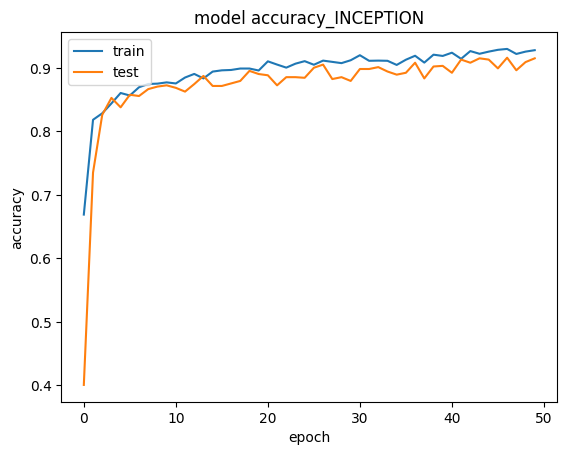

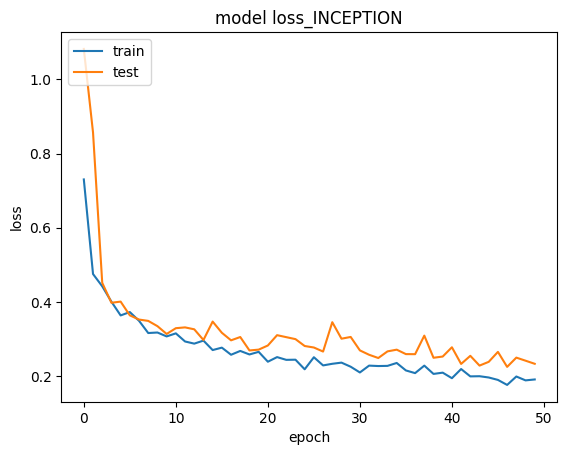

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy_INCEPTION')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_INCEPTION')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

In [53]:
# Generate predictions
predictions = lightweight_inception_model.predict(validation_generator, steps=len(validation_generator), verbose=1)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = validation_generator.classes

64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step


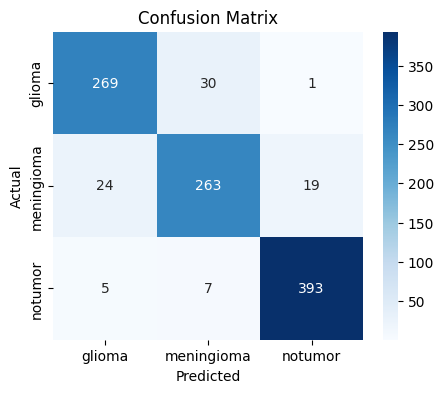

In [54]:
import seaborn as sns
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()